In [1]:
import sys
print(sys.executable)


/Users/anzheladavityan/miniconda3/envs/capstone/bin/python


In [2]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib seaborn librosa soundfile


  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (16 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached pooch-1.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl (1.1 MB)
Using cached audioread-3.1.0-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached pooch-1.9.0-py3-none-any.whl (67 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [librosa]m7/8 [librosa]


In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa


## Audio_Speech_Actors_01-24

In [2]:
RAVDESS_ROOT = "/Users/anzheladavityan/Desktop/RAVDESS/Audio_Speech_Actors_01-24"

files = glob.glob(os.path.join(RAVDESS_ROOT, "**", "*.wav"), recursive=True)

print("Total files:", len(files))


Total files: 1440


In [3]:
emo_map = {
    "01":"neutral", "02":"calm", "03":"happy", "04":"sad",
    "05":"angry", "06":"fearful", "07":"disgust", "08":"surprised"
}

int_map = {"01":"normal","02":"strong"}
stmt_map = {"01":"kids","02":"dogs"}

data = []

for path in files:
    filename = os.path.basename(path).replace(".wav","")
    parts = filename.split("-")
    
    actor_id = int(parts[6])
    
    data.append({
        "path": path,
        "emotion": emo_map[parts[2]],
        "intensity": int_map[parts[3]],
        "statement": stmt_map[parts[4]],
        "repetition": int(parts[5]),
        "actor": actor_id,
        "gender": "female" if actor_id % 2 == 0 else "male"
    })

df = pd.DataFrame(data)

df.head()


,path,emotion,intensity,statement,repetition,actor,gender
0,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,angry,normal,dogs,1,16,female
1,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,fearful,normal,dogs,2,16,female
2,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,fearful,strong,kids,2,16,female
3,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,angry,strong,kids,1,16,female
4,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,disgust,normal,kids,1,16,female


In [4]:
print("Samples:", len(df))
print("Actors:", df["actor"].nunique())
print("Emotions:", df["emotion"].unique())


Samples: 1440
Actors: 24
Emotions: ['angry' 'fearful' 'disgust' 'sad' 'surprised' 'happy' 'calm' 'neutral']


In [5]:
emotion_counts = df["emotion"].value_counts().sort_index()
emotion_pct = (emotion_counts / emotion_counts.sum() * 100).round(2)

pd.DataFrame({
    "count": emotion_counts,
    "percentage": emotion_pct
})


,count,percentage
emotion,,
angry,192,13.33
calm,192,13.33
disgust,192,13.33
fearful,192,13.33
happy,192,13.33
neutral,96,6.67
sad,192,13.33
surprised,192,13.33


In [6]:
pd.crosstab(df["gender"], df["emotion"])


emotion,angry,calm,disgust,fearful,happy,neutral,sad,surprised
gender,,,,,,,,
female,96,96,96,96,96,48,96,96
male,96,96,96,96,96,48,96,96


In [7]:
pd.crosstab(df["emotion"], df["intensity"])


intensity,normal,strong
emotion,,
angry,96,96
calm,96,96
disgust,96,96
fearful,96,96
happy,96,96
neutral,96,0
sad,96,96
surprised,96,96


In [8]:
df["actor"].value_counts().sort_index()


actor
1     60
2     60
3     60
4     60
5     60
6     60
7     60
8     60
9     60
10    60
11    60
12    60
13    60
14    60
15    60
16    60
17    60
18    60
19    60
20    60
21    60
22    60
23    60
24    60
Name: count, dtype: int64

In [9]:
pd.crosstab(df["statement"], df["emotion"])


emotion,angry,calm,disgust,fearful,happy,neutral,sad,surprised
statement,,,,,,,,
dogs,96,96,96,96,96,48,96,96
kids,96,96,96,96,96,48,96,96


In [10]:
pd.crosstab(df["repetition"], df["emotion"])


emotion,angry,calm,disgust,fearful,happy,neutral,sad,surprised
repetition,,,,,,,,
1,96,96,96,96,96,48,96,96
2,96,96,96,96,96,48,96,96


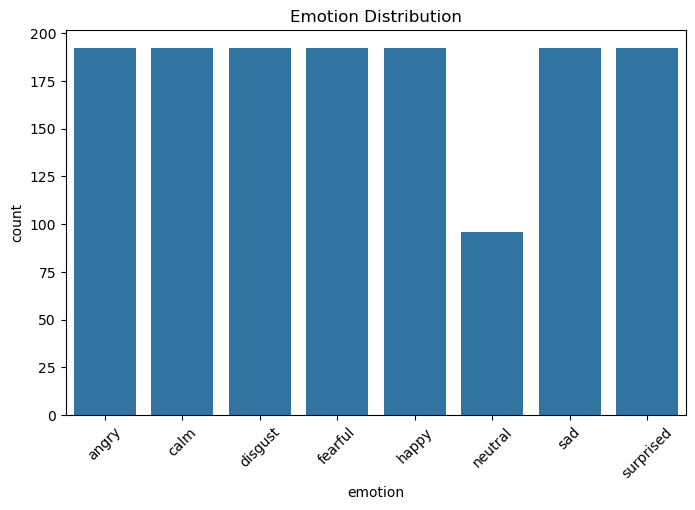

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="emotion", order=sorted(df["emotion"].unique()))
plt.title("Emotion Distribution")
plt.xticks(rotation=45)
plt.show()


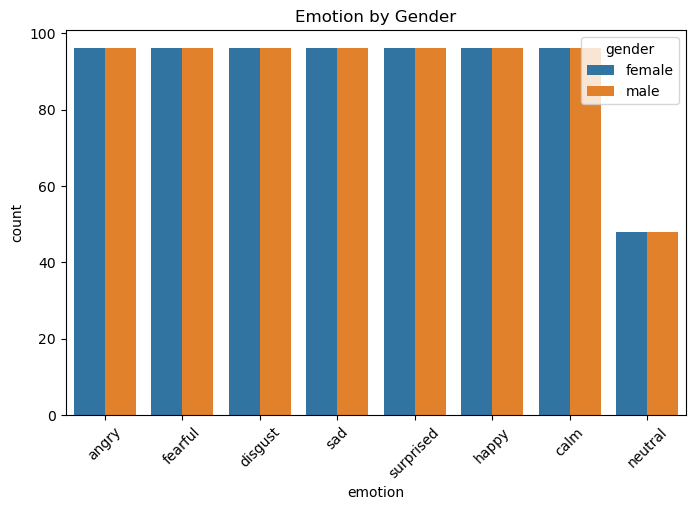

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="emotion", hue="gender")
plt.xticks(rotation=45)
plt.title("Emotion by Gender")
plt.show()


In [13]:
durations = []
sample_rates = []

for path in df["path"]:
    y, sr = librosa.load(path, sr=None)
    durations.append(len(y)/sr)
    sample_rates.append(sr)

df["duration_sec"] = durations
df["sample_rate"] = sample_rates


In [14]:
df["sample_rate"].unique()


array([48000])

In [15]:
df["duration_sec"].describe()


count    1440.000000
mean        3.700665
std         0.336676
min         2.936271
25%         3.470146
50%         3.670333
75%         3.870542
max         5.271937
Name: duration_sec, dtype: float64

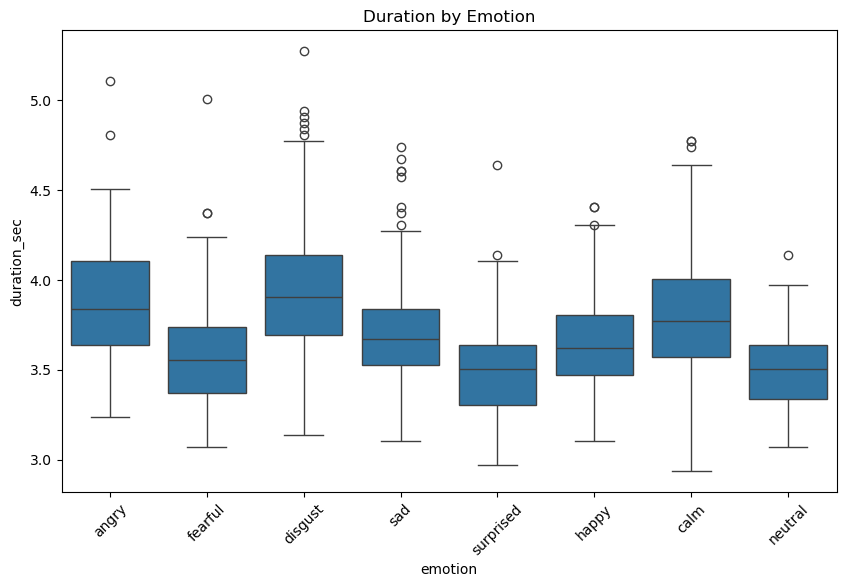

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="emotion", y="duration_sec")
plt.xticks(rotation=45)
plt.title("Duration by Emotion")
plt.show()


## Audio_Song_Actors_01-24


In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

SONG_ROOT = "/Users/anzheladavityan/Desktop/RAVDESS/Audio_Song_Actors_01-24"

files = glob.glob(os.path.join(SONG_ROOT, "**", "*.wav"), recursive=True)

print("Total song files found:", len(files))


Total song files found: 1012


In [5]:
sorted(set([os.path.basename(f).split("-")[2] for f in files]))


['01', '02', '03', '04', '05', '06']

In [6]:
emo_map = {
    "01":"neutral",
    "02":"calm",
    "03":"happy",
    "04":"sad",
    "05":"angry",
    "06":"fearful",
    "07":"disgust",
    "08":"surprised"
}


int_map = {"01":"normal","02":"strong"}
stmt_map = {"01":"kids","02":"dogs"}

data_song = []

for path in files:
    filename = os.path.basename(path).replace(".wav","")
    parts = filename.split("-")
    
    actor_id = int(parts[6])
    
    data_song.append({
        "path": path,
        "emotion": emo_map.get(parts[2], parts[2]),
        "intensity": int_map[parts[3]],
        "statement": stmt_map[parts[4]],
        "repetition": int(parts[5]),
        "actor": actor_id,
        "gender": "female" if actor_id % 2 == 0 else "male"
    })

df_song = pd.DataFrame(data_song)
df_song.head()


,path,emotion,intensity,statement,repetition,actor,gender
0,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,happy,strong,dogs,2,16,female
1,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,happy,normal,kids,2,16,female
2,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,calm,strong,kids,1,16,female
3,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,calm,normal,dogs,1,16,female
4,/Users/anzheladavityan/Desktop/RAVDESS/Audio_S...,neutral,normal,dogs,2,16,female


In [7]:
print("Total samples:", len(df_song))
print("Unique actors:", df_song["actor"].nunique())
print("Actors:", sorted(df_song["actor"].unique()))
print("Unique emotions:", df_song["emotion"].unique())


Total samples: 1012
Unique actors: 23
Actors: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
Unique emotions: ['happy' 'calm' 'neutral' 'fearful' 'angry' 'sad']


In [8]:
emotion_counts = df_song["emotion"].value_counts().sort_index()
emotion_pct = (emotion_counts / emotion_counts.sum() * 100).round(2)

pd.DataFrame({
    "count": emotion_counts,
    "percentage": emotion_pct
})


,count,percentage
emotion,,
angry,184,18.18
calm,184,18.18
fearful,184,18.18
happy,184,18.18
neutral,92,9.09
sad,184,18.18


In [9]:
pd.crosstab(df_song["gender"], df_song["emotion"])


emotion,angry,calm,fearful,happy,neutral,sad
gender,,,,,,
female,88,88,88,88,44,88
male,96,96,96,96,48,96


In [10]:
pd.crosstab(df_song["emotion"], df_song["intensity"])


intensity,normal,strong
emotion,,
angry,92,92
calm,92,92
fearful,92,92
happy,92,92
neutral,92,0
sad,92,92


In [11]:
df_song["actor"].value_counts().sort_index()


actor
1     44
2     44
3     44
4     44
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    44
13    44
14    44
15    44
16    44
17    44
19    44
20    44
21    44
22    44
23    44
24    44
Name: count, dtype: int64

In [12]:
pd.crosstab(df_song["statement"], df_song["emotion"])


emotion,angry,calm,fearful,happy,neutral,sad
statement,,,,,,
dogs,92,92,92,92,46,92
kids,92,92,92,92,46,92


In [13]:
pd.crosstab(df_song["repetition"], df_song["emotion"])


emotion,angry,calm,fearful,happy,neutral,sad
repetition,,,,,,
1,92,92,92,92,46,92
2,92,92,92,92,46,92


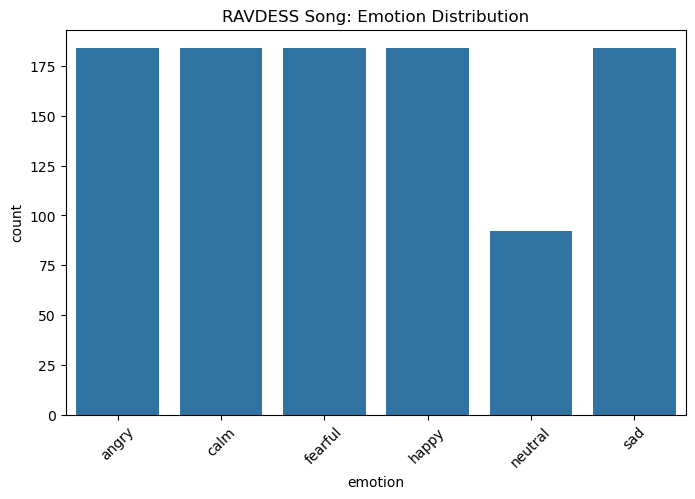

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_song, x="emotion", order=sorted(df_song["emotion"].unique()))
plt.title("RAVDESS Song: Emotion Distribution")
plt.xticks(rotation=45)
plt.show()


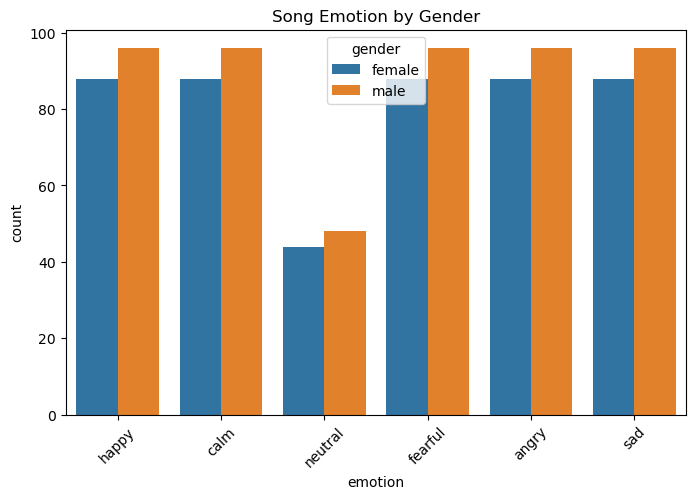

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_song, x="emotion", hue="gender")
plt.xticks(rotation=45)
plt.title("Song Emotion by Gender")
plt.show()


In [16]:
durations = []
sample_rates = []

for path in df_song["path"]:
    y, sr = librosa.load(path, sr=None)
    durations.append(len(y)/sr)
    sample_rates.append(sr)

df_song["duration_sec"] = durations
df_song["sample_rate"] = sample_rates


In [17]:
df_song["sample_rate"].unique()


array([48000])

In [18]:
df_song["duration_sec"].describe()


count    1012.000000
mean        4.649210
std         0.421534
min         3.503500
25%         4.371021
50%         4.604604
75%         4.871542
max         6.373042
Name: duration_sec, dtype: float64

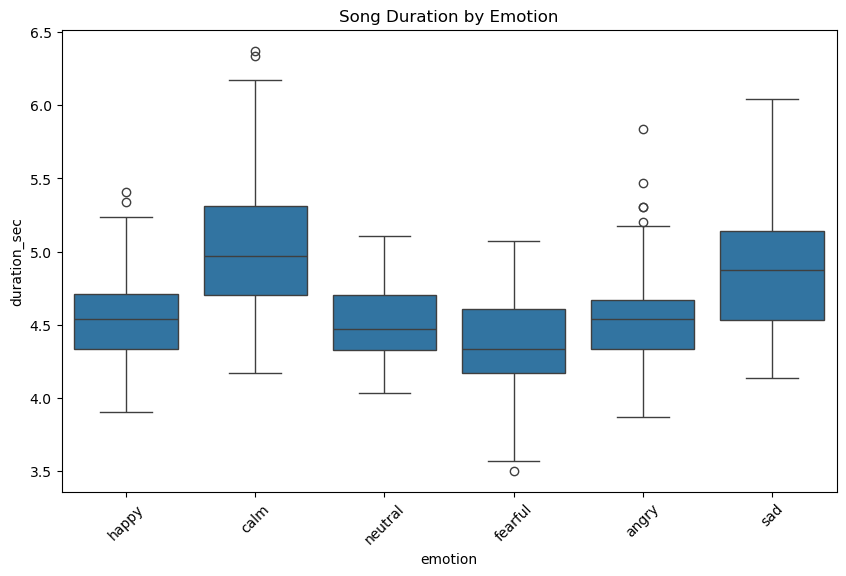

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_song, x="emotion", y="duration_sec")
plt.xticks(rotation=45)
plt.title("Song Duration by Emotion")
plt.show()


# Speech--8 emotions,24 actors,1440 samples,shorter duration
# Song--5 emotions,23 actors,1012 samples,longer duration

In [20]:
import sys
!{sys.executable} -m pip install opencv-python


  Using cached opencv_python-4.13.0.92-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
Using cached opencv_python-4.13.0.92-cp37-abi3-macosx_13_0_arm64.whl (46.2 MB)


In [21]:
import cv2


In [23]:
import glob

speech_files = glob.glob("RAVDESS/speech/**/*.mp4", recursive=True)
song_files   = glob.glob("RAVDESS/song/**/*.mp4", recursive=True)

print("Speech videos:", len(speech_files))
print("Song videos:", len(song_files))


Speech videos: 2880
Song videos: 2024


In [25]:
emo_map = {
    "01":"neutral", "02":"calm", "03":"happy", "04":"sad",
    "05":"angry", "06":"fearful", "07":"disgust", "08":"surprised"
}

int_map = {"01":"normal","02":"strong"}

stmt_map = {"01":"kids","02":"dogs"}

mod_map = {"01":"full-AV","02":"video-only","03":"audio-only"}


In [28]:
import os
import pandas as pd

emo_map = {
    "01":"neutral", "02":"calm", "03":"happy", "04":"sad",
    "05":"angry", "06":"fearful", "07":"disgust", "08":"surprised"
}

int_map = {"01":"normal","02":"strong"}
stmt_map = {"01":"kids","02":"dogs"}
mod_map = {"01":"full-AV","02":"video-only"}

speech_data = []

for path in speech_files:
    filename = os.path.basename(path).replace(".mp4","")
    parts = filename.split("-")
    
    actor_id = int(parts[6])
    
    speech_data.append({
        "path": path,
        "modality": mod_map[parts[0]],
        "emotion": emo_map[parts[2]],
        "intensity": int_map[parts[3]],
        "statement": stmt_map[parts[4]],
        "repetition": int(parts[5]),
        "actor": actor_id,
        "gender": "female" if actor_id % 2 == 0 else "male"
    })

df_speech_video = pd.DataFrame(speech_data)
df_speech_video.head()


,path,modality,emotion,intensity,statement,repetition,actor,gender
0,RAVDESS/speech/Actor_16/02-01-08-02-02-01-16.mp4,video-only,surprised,strong,dogs,1,16,female
1,RAVDESS/speech/Actor_16/02-01-08-01-01-01-16.mp4,video-only,surprised,normal,kids,1,16,female
2,RAVDESS/speech/Actor_16/01-01-06-01-02-01-16.mp4,full-AV,fearful,normal,dogs,1,16,female
3,RAVDESS/speech/Actor_16/01-01-05-01-02-02-16.mp4,full-AV,angry,normal,dogs,2,16,female
4,RAVDESS/speech/Actor_16/01-01-05-02-01-02-16.mp4,full-AV,angry,strong,kids,2,16,female


In [26]:
song_data = []

for path in song_files:
    filename = os.path.basename(path).replace(".mp4","")
    parts = filename.split("-")
    
    actor_id = int(parts[6])
    
    song_data.append({
        "path": path,
        "modality": mod_map[parts[0]],
        "emotion": emo_map[parts[2]],
        "intensity": int_map[parts[3]],
        "statement": stmt_map[parts[4]],
        "repetition": int(parts[5]),
        "actor": actor_id,
        "gender": "female" if actor_id % 2 == 0 else "male"
    })

df_song_video = pd.DataFrame(song_data)
df_song_video.head()


,path,modality,emotion,intensity,statement,repetition,actor,gender
0,RAVDESS/song/Actor_16/01-02-03-02-02-01-16.mp4,full-AV,happy,strong,dogs,1,16,female
1,RAVDESS/song/Actor_16/01-02-03-01-01-01-16.mp4,full-AV,happy,normal,kids,1,16,female
2,RAVDESS/song/Actor_16/01-02-02-02-01-02-16.mp4,full-AV,calm,strong,kids,2,16,female
3,RAVDESS/song/Actor_16/01-02-01-01-02-01-16.mp4,full-AV,neutral,normal,dogs,1,16,female
4,RAVDESS/song/Actor_16/01-02-02-01-02-02-16.mp4,full-AV,calm,normal,dogs,2,16,female


In [29]:
print("Speech video samples:", len(df_speech_video))
print("Song video samples:", len(df_song_video))

print("Speech emotions:", df_speech_video["emotion"].unique())
print("Song emotions:", df_song_video["emotion"].unique())


Speech video samples: 2880
Song video samples: 2024
Speech emotions: ['surprised' 'fearful' 'angry' 'sad' 'disgust' 'happy' 'calm' 'neutral']
Song emotions: ['happy' 'calm' 'neutral' 'angry' 'fearful' 'sad']


## Speech dataset-frame

Found 5760 speech videos.
Processed 10/5760 videos...
Processed 20/5760 videos...
Processed 30/5760 videos...
Processed 40/5760 videos...
Processed 50/5760 videos...
Processed 60/5760 videos...
Processed 70/5760 videos...
Processed 80/5760 videos...
Processed 90/5760 videos...
Processed 100/5760 videos...
Processed 110/5760 videos...
Processed 120/5760 videos...
Processed 130/5760 videos...
Processed 140/5760 videos...
Processed 150/5760 videos...
Processed 160/5760 videos...
Processed 170/5760 videos...
Processed 180/5760 videos...
Processed 190/5760 videos...
Processed 200/5760 videos...
Processed 210/5760 videos...
Processed 220/5760 videos...
Processed 230/5760 videos...
Processed 240/5760 videos...
Processed 250/5760 videos...
Processed 260/5760 videos...
Processed 270/5760 videos...
Processed 280/5760 videos...
Processed 290/5760 videos...
Processed 300/5760 videos...
Processed 310/5760 videos...
Processed 320/5760 videos...
Processed 330/5760 videos...
Processed 340/5760 videos.

Processed 2770/5760 videos...
Processed 2780/5760 videos...
Processed 2790/5760 videos...
Processed 2800/5760 videos...
Processed 2810/5760 videos...
Processed 2820/5760 videos...
Processed 2830/5760 videos...
Processed 2840/5760 videos...
Processed 2850/5760 videos...
Processed 2860/5760 videos...
Processed 2870/5760 videos...
Processed 2880/5760 videos...
Processed 2890/5760 videos...
Processed 2900/5760 videos...
Processed 2910/5760 videos...
Processed 2920/5760 videos...
Processed 2930/5760 videos...
Processed 2940/5760 videos...
Processed 2950/5760 videos...
Processed 2960/5760 videos...
Processed 2970/5760 videos...
Processed 2980/5760 videos...
Processed 2990/5760 videos...
Processed 3000/5760 videos...
Processed 3010/5760 videos...
Processed 3020/5760 videos...
Processed 3030/5760 videos...
Processed 3040/5760 videos...
Processed 3050/5760 videos...
Processed 3060/5760 videos...
Processed 3070/5760 videos...
Processed 3080/5760 videos...
Processed 3090/5760 videos...
Processed 

Processed 5510/5760 videos...
Processed 5520/5760 videos...
Processed 5530/5760 videos...
Processed 5540/5760 videos...
Processed 5550/5760 videos...
Processed 5560/5760 videos...
Processed 5570/5760 videos...
Processed 5580/5760 videos...
Processed 5590/5760 videos...
Processed 5600/5760 videos...
Processed 5610/5760 videos...
Processed 5620/5760 videos...
Processed 5630/5760 videos...
Processed 5640/5760 videos...
Processed 5650/5760 videos...
Processed 5660/5760 videos...
Processed 5670/5760 videos...
Processed 5680/5760 videos...
Processed 5690/5760 videos...
Processed 5700/5760 videos...
Processed 5710/5760 videos...
Processed 5720/5760 videos...
Processed 5730/5760 videos...
Processed 5740/5760 videos...
Processed 5750/5760 videos...
Processed 5760/5760 videos...

DataFrame shape: (5760, 11)

Missing values:
 path               0
actor_id           0
fps                0
width              0
height             0
frames             0
duration_sec       0
brightness_mean    0
brigh

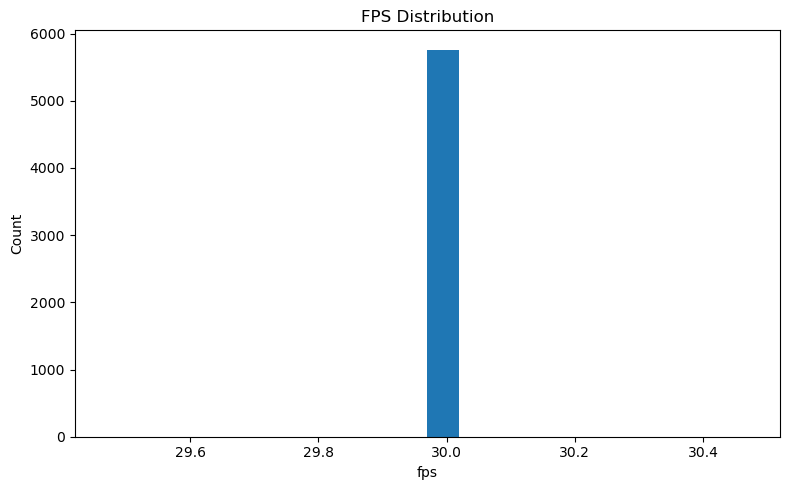

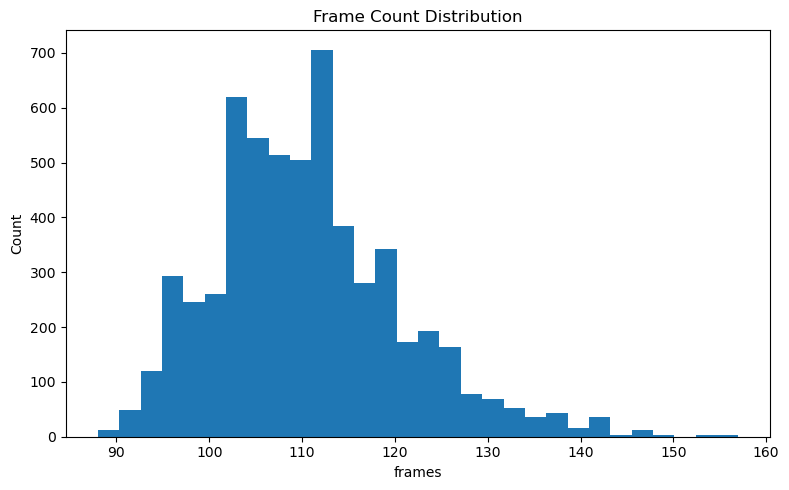

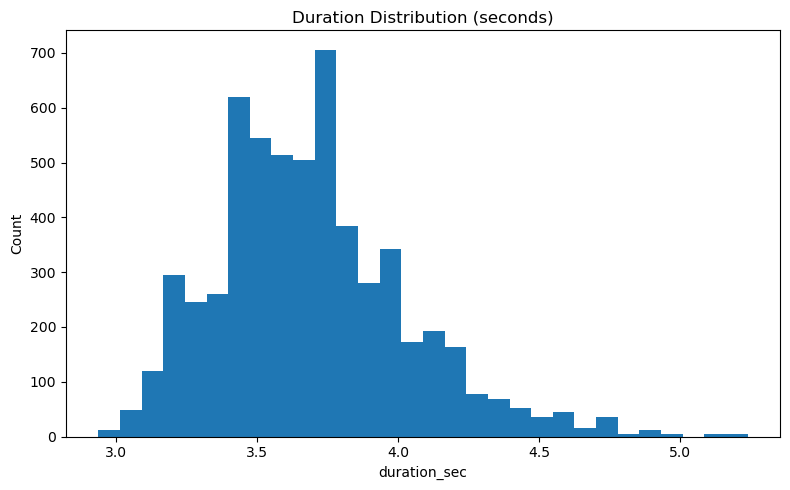

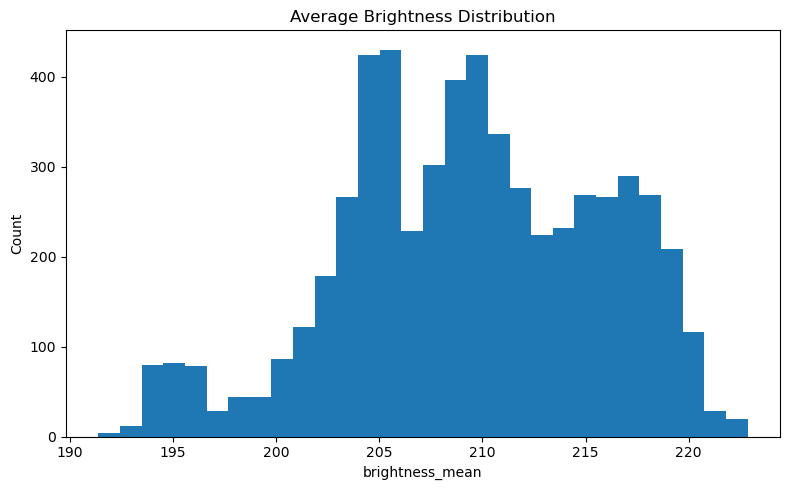

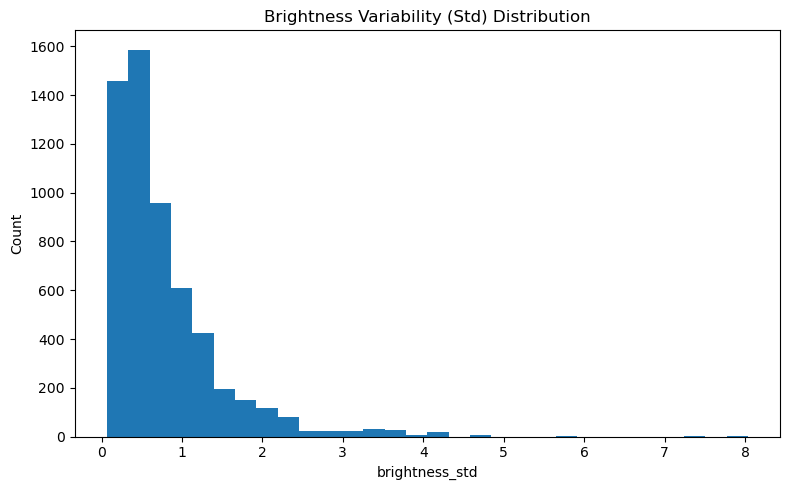

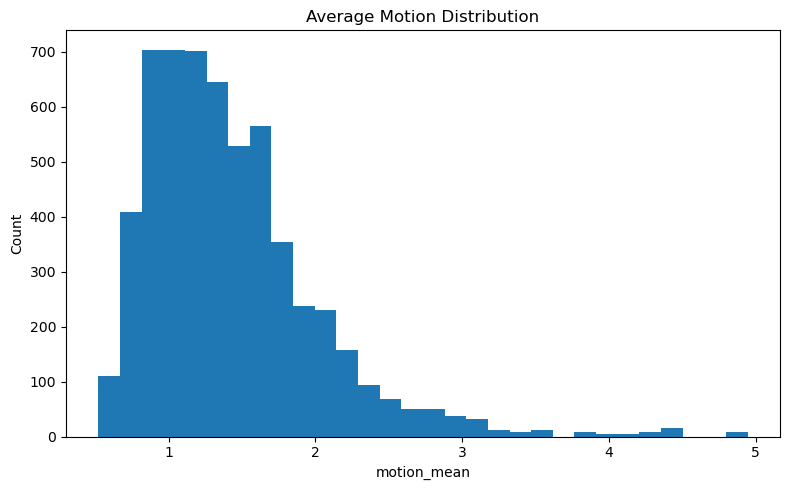

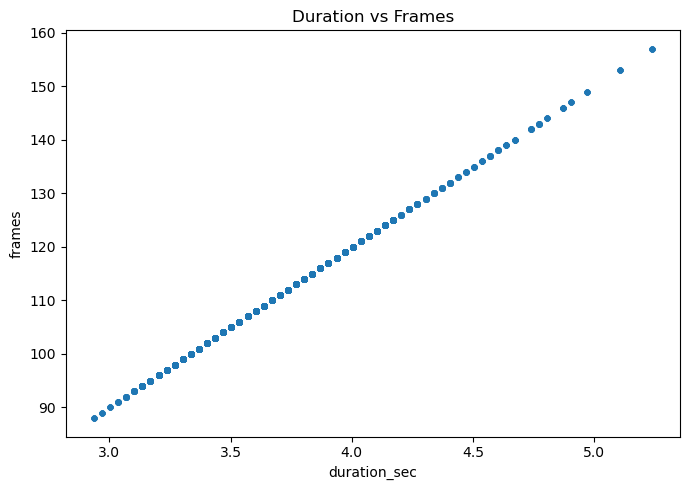

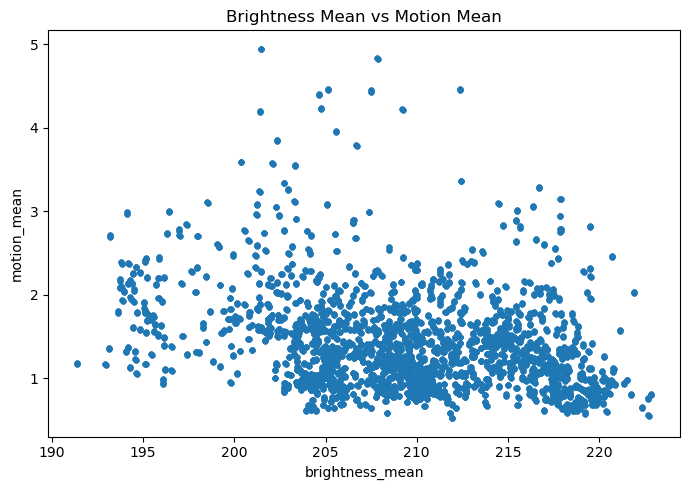

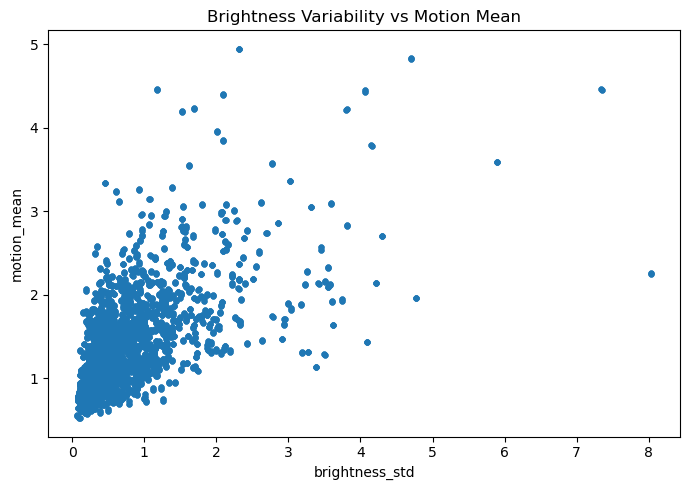

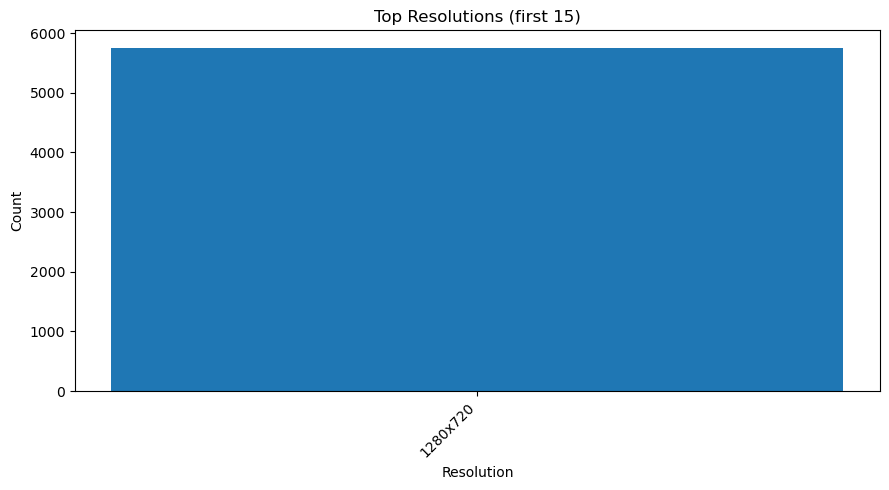


Top 5 longest videos by duration:
                                                  path       fps  frames  \
4418  RAVDESS/speech/Actor_19/01-01-07-02-01-02-19.mp4  29.97003     157   
4419  RAVDESS/speech/Actor_19/01-01-07-02-01-02-19.mp4  29.97003     157   
4538  RAVDESS/speech/Actor_19/02-01-07-02-01-02-19.mp4  29.97003     157   
4539  RAVDESS/speech/Actor_19/02-01-07-02-01-02-19.mp4  29.97003     157   
5711  RAVDESS/speech/Actor_24/02-01-05-02-02-02-24.mp4  29.97003     153   

      duration_sec  
4418      5.238567  
4419      5.238567  
4538      5.238567  
4539      5.238567  
5711      5.105100  

Top 5 shortest videos by duration:
                                                  path       fps  frames  \
3014  RAVDESS/speech/Actor_13/02-01-02-01-02-02-13.mp4  29.97003      88   
3015  RAVDESS/speech/Actor_13/02-01-02-01-02-02-13.mp4  29.97003      88   
2895  RAVDESS/speech/Actor_13/01-01-02-01-02-02-13.mp4  29.97003      88   
2894  RAVDESS/speech/Actor_13/01-01-02-01-

In [3]:
# =========================
# FULL PIPELINE: Video-frame statistics + EDA (Speech MP4s)
# Reads ALL frames (no saving), computes streaming stats per video,
# builds a DataFrame, and plots EDA based on frame-derived features.
# =========================

import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1) Collect video paths
# -------------------------
speech_files = sorted(glob.glob("RAVDESS/speech/**/**/*.mp4", recursive=True))
print(f"Found {len(speech_files)} speech videos.")

# -------------------------
# 2) Helpers
# -------------------------
def safe_float(x, default=np.nan):
    try:
        x = float(x)
        if np.isfinite(x):
            return x
        return default
    except Exception:
        return default

def parse_actor_id_from_filename(path):
    """
    RAVDESS filename example:
    02-01-06-01-02-01-12.mp4
    parts[6] -> actor id (12)
    """
    base = os.path.basename(path)
    name, _ = os.path.splitext(base)
    parts = name.split("-")
    if len(parts) >= 7 and parts[6].isdigit():
        return int(parts[6])
    return np.nan

# -------------------------
# 3) Process videos (ALL frames)
#    Streaming computations to avoid large memory usage:
#    - brightness_mean: mean(gray.mean()) over frames
#    - brightness_std: std of per-frame mean brightness
#    - motion_mean: mean of mean(absdiff(gray_t, gray_{t-1}))
# -------------------------
video_stats = []

for i, path in enumerate(speech_files, start=1):
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        video_stats.append({
            "path": path,
            "actor_id": parse_actor_id_from_filename(path),
            "fps": np.nan,
            "width": np.nan,
            "height": np.nan,
            "frames": 0,
            "duration_sec": np.nan,
            "brightness_mean": np.nan,
            "brightness_std": np.nan,
            "motion_mean": np.nan,
            "read_ok": False
        })
        continue

    fps = safe_float(cap.get(cv2.CAP_PROP_FPS), default=np.nan)
    width = safe_float(cap.get(cv2.CAP_PROP_FRAME_WIDTH), default=np.nan)
    height = safe_float(cap.get(cv2.CAP_PROP_FRAME_HEIGHT), default=np.nan)

    frame_count = 0
    prev_gray = None

    # Streaming stats for per-frame brightness mean:
    # Welford's algorithm for mean and variance
    b_mean = 0.0
    b_M2 = 0.0

    # Streaming mean for motion (avg diff)
    motion_sum = 0.0
    motion_n = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Per-frame brightness (mean pixel intensity)
        b = float(gray.mean())

        frame_count += 1
        # Update Welford
        delta = b - b_mean
        b_mean += delta / frame_count
        delta2 = b - b_mean
        b_M2 += delta * delta2

        # Motion: mean absolute difference vs previous frame
        if prev_gray is not None:
            diff = cv2.absdiff(gray, prev_gray)
            motion_sum += float(diff.mean())
            motion_n += 1

        prev_gray = gray

    cap.release()

    # Finalize stats
    brightness_mean = b_mean if frame_count > 0 else np.nan
    brightness_var = (b_M2 / (frame_count - 1)) if frame_count > 1 else np.nan
    brightness_std = float(np.sqrt(brightness_var)) if np.isfinite(brightness_var) else np.nan

    motion_mean = (motion_sum / motion_n) if motion_n > 0 else 0.0
    duration_sec = (frame_count / fps) if (fps and np.isfinite(fps) and fps > 0) else np.nan

    video_stats.append({
        "path": path,
        "actor_id": parse_actor_id_from_filename(path),
        "fps": fps,
        "width": width,
        "height": height,
        "frames": frame_count,
        "duration_sec": duration_sec,
        "brightness_mean": brightness_mean,
        "brightness_std": brightness_std,
        "motion_mean": motion_mean,
        "read_ok": True
    })

    # Progress print every 10 videos
    if i % 10 == 0 or i == len(speech_files):
        print(f"Processed {i}/{len(speech_files)} videos...")

# -------------------------
# 4) DataFrame + basic checks
# -------------------------
df_frames = pd.DataFrame(video_stats)

print("\nDataFrame shape:", df_frames.shape)
print("\nMissing values:\n", df_frames.isna().sum())
print("\nFPS unique (first 20):", df_frames["fps"].dropna().unique()[:20])

# Optional: save stats for later
# df_frames.to_csv("speech_video_frame_stats.csv", index=False)

# -------------------------
# 5) EDA PLOTS (frame-based features only)
# -------------------------
# NOTE: If you run in Jupyter, make sure you have:
# %matplotlib inline
# at the top of the notebook (optional).

# Helper for nice plotting
def hist_plot(series, title, bins=30):
    s = series.dropna()
    plt.figure(figsize=(8, 5))
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

def scatter_plot(x, y, title):
    d = df_frames[[x, y]].dropna()
    plt.figure(figsize=(7, 5))
    plt.scatter(d[x], d[y], s=12)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# 5.1 Distributions
hist_plot(df_frames["fps"].rename("fps"), "FPS Distribution", bins=20)
hist_plot(df_frames["frames"].rename("frames"), "Frame Count Distribution", bins=30)
hist_plot(df_frames["duration_sec"].rename("duration_sec"), "Duration Distribution (seconds)", bins=30)
hist_plot(df_frames["brightness_mean"].rename("brightness_mean"), "Average Brightness Distribution", bins=30)
hist_plot(df_frames["brightness_std"].rename("brightness_std"), "Brightness Variability (Std) Distribution", bins=30)
hist_plot(df_frames["motion_mean"].rename("motion_mean"), "Average Motion Distribution", bins=30)

# 5.2 Relationship plots
scatter_plot("duration_sec", "frames", "Duration vs Frames")
scatter_plot("brightness_mean", "motion_mean", "Brightness Mean vs Motion Mean")
scatter_plot("brightness_std", "motion_mean", "Brightness Variability vs Motion Mean")

# 5.3 Resolution summary (counts)
df_frames["resolution"] = df_frames["width"].astype("Int64").astype(str) + "x" + df_frames["height"].astype("Int64").astype(str)
res_counts = df_frames["resolution"].value_counts()

plt.figure(figsize=(9, 5))
plt.bar(res_counts.index[:15], res_counts.values[:15])
plt.title("Top Resolutions (first 15)")
plt.xlabel("Resolution")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5.4 Outlier inspection: longest/shortest videos by duration
print("\nTop 5 longest videos by duration:")
print(df_frames.sort_values("duration_sec", ascending=False)[["path", "fps", "frames", "duration_sec"]].head(5))

print("\nTop 5 shortest videos by duration:")
print(df_frames.sort_values("duration_sec", ascending=True)[["path", "fps", "frames", "duration_sec"]].head(5))

# 5.5 Quick descriptive statistics (frame-based columns)
frame_cols = ["fps", "frames", "duration_sec", "brightness_mean", "brightness_std", "motion_mean"]
print("\nDescriptive statistics (frame-based):")
print(df_frames[frame_cols].describe(include="all"))

In [4]:
import psutil
import os

process = psutil.Process(os.getpid())
memory_info = process.memory_info()

print("Memory used by Python (MB):", memory_info.rss / 1024 / 1024)

Memory used by Python (MB): 41.109375


Total SONG videos found: 4048
Processed 20/4048 SONG videos
Processed 40/4048 SONG videos
Processed 60/4048 SONG videos
Processed 80/4048 SONG videos
Processed 100/4048 SONG videos
Processed 120/4048 SONG videos
Processed 140/4048 SONG videos
Processed 160/4048 SONG videos
Processed 180/4048 SONG videos
Processed 200/4048 SONG videos
Processed 220/4048 SONG videos
Processed 240/4048 SONG videos
Processed 260/4048 SONG videos
Processed 280/4048 SONG videos
Processed 300/4048 SONG videos
Processed 320/4048 SONG videos
Processed 340/4048 SONG videos
Processed 360/4048 SONG videos
Processed 380/4048 SONG videos
Processed 400/4048 SONG videos
Processed 420/4048 SONG videos
Processed 440/4048 SONG videos
Processed 460/4048 SONG videos
Processed 480/4048 SONG videos
Processed 500/4048 SONG videos
Processed 520/4048 SONG videos
Processed 540/4048 SONG videos
Processed 560/4048 SONG videos
Processed 580/4048 SONG videos
Processed 600/4048 SONG videos
Processed 620/4048 SONG videos
Processed 640

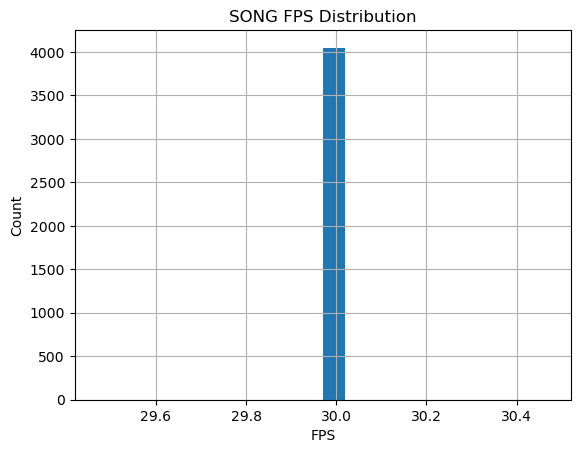

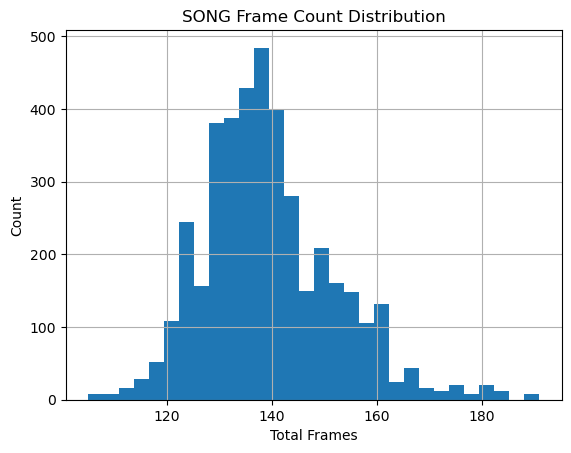

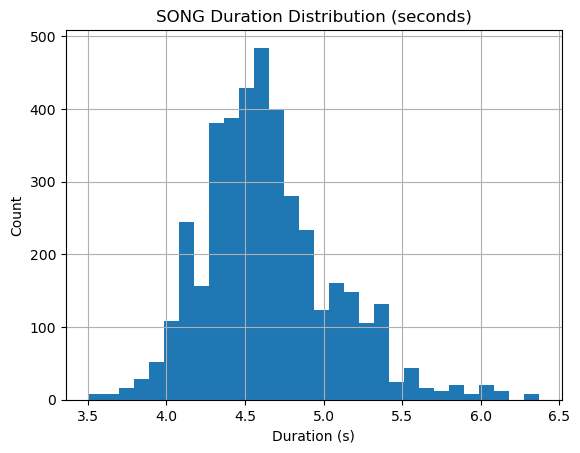

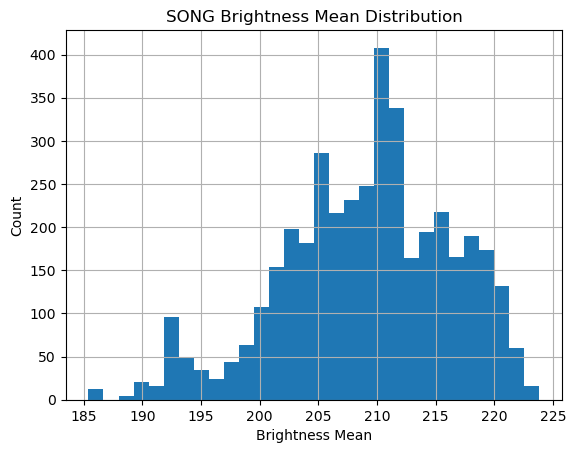

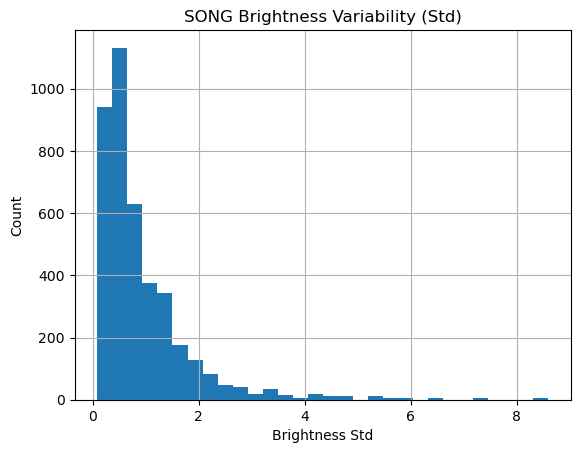

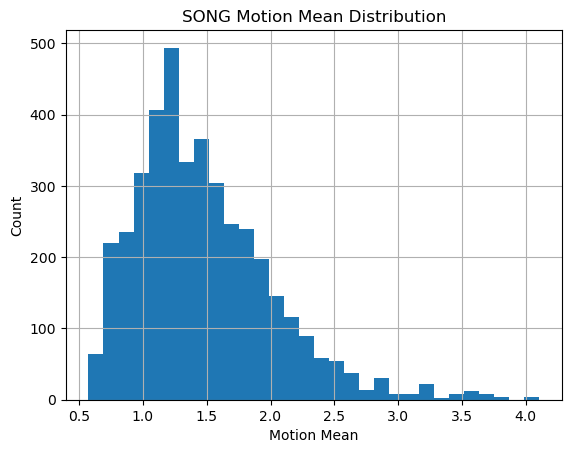

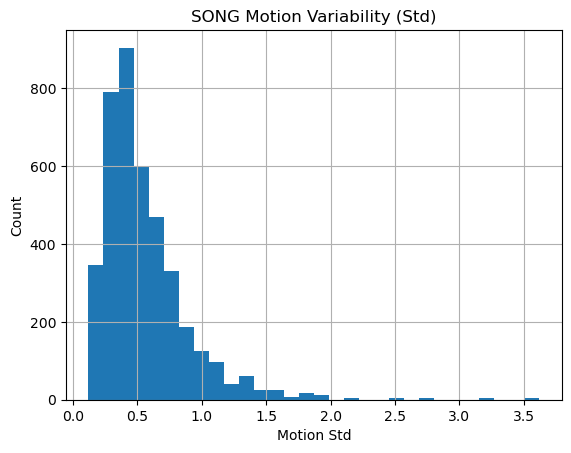


Descriptive Statistics (SONG):
                fps  frame_count   duration_s   width  height  \
count  4.048000e+03  4048.000000  4048.000000  4048.0  4048.0   
mean   2.997003e+01   139.312747     4.648402  1280.0   720.0   
std    1.421261e-14    12.630011     0.421421     0.0     0.0   
min    2.997003e+01   105.000000     3.503500  1280.0   720.0   
25%    2.997003e+01   131.000000     4.371033  1280.0   720.0   
50%    2.997003e+01   138.000000     4.604600  1280.0   720.0   
75%    2.997003e+01   146.000000     4.871533  1280.0   720.0   
max    2.997003e+01   191.000000     6.373033  1280.0   720.0   

       brightness_mean  brightness_std  motion_mean   motion_std  
count      4048.000000     4048.000000  4048.000000  4048.000000  
mean        209.116837        0.931854     1.476472     0.559055  
std           7.235613        0.900221     0.540683     0.342756  
min         185.412890        0.087693     0.573476     0.120947  
25%         204.692922        0.393349     1.09

In [5]:
# =========================
# RAVDESS SONG Video Frame EDA
# =========================

import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1) Collect SONG video paths
# -------------------------
song_files = sorted(glob.glob("RAVDESS/song/**/**/*.mp4", recursive=True))
print(f"Total SONG videos found: {len(song_files)}")

# -------------------------
# 2) Video processing function
# -------------------------
def compute_song_video_stats(path):
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        return None

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

    if fps is None or fps <= 0:
        fps = 30.0  # fallback

    duration = total_frames / fps if total_frames > 0 else np.nan

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    brightness_vals = []
    motion_vals = []

    prev_gray = None
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Brightness
        brightness_vals.append(gray.mean())

        # Motion
        if prev_gray is not None:
            diff = cv2.absdiff(gray, prev_gray)
            motion_vals.append(diff.mean())

        prev_gray = gray
        frame_count += 1

    cap.release()

    return {
        "path": path,
        "fps": fps,
        "frame_count": total_frames,
        "duration_s": duration,
        "width": width,
        "height": height,
        "brightness_mean": np.mean(brightness_vals),
        "brightness_std": np.std(brightness_vals),      # Brightness variability
        "motion_mean": np.mean(motion_vals),
        "motion_std": np.std(motion_vals)               # Temporal stability
    }

# -------------------------
# 3) Process all SONG videos
# -------------------------
song_stats = []

for i, path in enumerate(song_files, start=1):
    stats = compute_song_video_stats(path)
    if stats:
        song_stats.append(stats)

    if i % 20 == 0 or i == len(song_files):
        print(f"Processed {i}/{len(song_files)} SONG videos")

df_song = pd.DataFrame(song_stats)

print("\nDataFrame shape:", df_song.shape)
print(df_song.head())

# -------------------------
# 4) Resolution Consistency
# -------------------------
unique_res = df_song[["width", "height"]].drop_duplicates()
print("\nUnique Resolutions in SONG:")
print(unique_res)

# -------------------------
# 5) EDA Plots
# -------------------------

# FPS Distribution
plt.figure()
df_song["fps"].hist(bins=20)
plt.title("SONG FPS Distribution")
plt.xlabel("FPS")
plt.ylabel("Count")
plt.show()

# Frame Count Distribution
plt.figure()
df_song["frame_count"].hist(bins=30)
plt.title("SONG Frame Count Distribution")
plt.xlabel("Total Frames")
plt.ylabel("Count")
plt.show()

# Duration Distribution
plt.figure()
df_song["duration_s"].hist(bins=30)
plt.title("SONG Duration Distribution (seconds)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()

# Brightness Mean Distribution
plt.figure()
df_song["brightness_mean"].hist(bins=30)
plt.title("SONG Brightness Mean Distribution")
plt.xlabel("Brightness Mean")
plt.ylabel("Count")
plt.show()

# Brightness Variability
plt.figure()
df_song["brightness_std"].hist(bins=30)
plt.title("SONG Brightness Variability (Std)")
plt.xlabel("Brightness Std")
plt.ylabel("Count")
plt.show()

# Motion Mean Distribution
plt.figure()
df_song["motion_mean"].hist(bins=30)
plt.title("SONG Motion Mean Distribution")
plt.xlabel("Motion Mean")
plt.ylabel("Count")
plt.show()

# Motion Variability (Temporal Stability)
plt.figure()
df_song["motion_std"].hist(bins=30)
plt.title("SONG Motion Variability (Std)")
plt.xlabel("Motion Std")
plt.ylabel("Count")
plt.show()

# -------------------------
# 6) Summary Statistics
# -------------------------
print("\nDescriptive Statistics (SONG):")
print(df_song.describe())

## VideoFlash

Videos found: 7442
Processed 200/7442 videos...
Processed 400/7442 videos...
Processed 600/7442 videos...
Processed 800/7442 videos...
Processed 1000/7442 videos...
Processed 1200/7442 videos...
Processed 1400/7442 videos...
Processed 1600/7442 videos...
Processed 1800/7442 videos...
Processed 2000/7442 videos...
Processed 2200/7442 videos...
Processed 2400/7442 videos...
Processed 2600/7442 videos...
Processed 2800/7442 videos...
Processed 3000/7442 videos...
Processed 3200/7442 videos...
Processed 3400/7442 videos...
Processed 3600/7442 videos...
Processed 3800/7442 videos...
Processed 4000/7442 videos...
Processed 4200/7442 videos...
Processed 4400/7442 videos...
Processed 4600/7442 videos...
Processed 4800/7442 videos...
Processed 5000/7442 videos...
Processed 5200/7442 videos...
Processed 5400/7442 videos...
Processed 5600/7442 videos...
Processed 5800/7442 videos...
Processed 6000/7442 videos...
Processed 6200/7442 videos...
Processed 6400/7442 videos...
Processed 6600/7442 video

,file,path,actor_id,sentence_code,emotion_code,emotion,level_code,level,fps,width,height,resolution,frame_count,brightness_mean_avg,brightness_mean_std,brightness_std_avg,brightness_absdiff_mean,brightness_absdiff_std,n_sampled_frames,sample_every_n_frames
0,1001_DFA_ANG_XX.flv,crema-d-mirror/VideoFlash/1001_DFA_ANG_XX.flv,1001,DFA,ANG,anger,XX,unspecified,29.969697,480,360,480x360,67,109.788055,0.044333,32.704784,0.093891,0.003101,3,30
1,1001_DFA_DIS_XX.flv,crema-d-mirror/VideoFlash/1001_DFA_DIS_XX.flv,1001,DFA,DIS,disgust,XX,unspecified,29.969697,480,360,480x360,70,109.801231,0.061269,32.467571,0.073078,0.029514,3,30
2,1001_DFA_FEA_XX.flv,crema-d-mirror/VideoFlash/1001_DFA_FEA_XX.flv,1001,DFA,FEA,fear,XX,unspecified,29.969697,480,360,480x360,65,109.585693,0.254665,32.462612,0.343555,0.240704,3,30
3,1001_DFA_HAP_XX.flv,crema-d-mirror/VideoFlash/1001_DFA_HAP_XX.flv,1001,DFA,HAP,happy,XX,unspecified,29.969697,480,360,480x360,56,109.752609,0.119511,32.439812,0.239021,0.000000,2,30
4,1001_DFA_NEU_XX.flv,crema-d-mirror/VideoFlash/1001_DFA_NEU_XX.flv,1001,DFA,NEU,neutral,XX,unspecified,29.969697,480,360,480x360,61,109.941566,0.051898,32.639202,0.063545,0.002541,3,30



--- Numeric summary ---


,fps,width,height,frame_count,brightness_mean_avg,brightness_mean_std,brightness_std_avg,brightness_absdiff_mean,brightness_absdiff_std,n_sampled_frames
count,7.442000e+03,7442.0,7442.0,7442.000000,7442.000000,7442.000000,7442.000000,7442.000000,7442.000000,7442.000000
mean,2.996970e+01,480.0,360.0,76.675894,111.217428,0.333046,24.154183,0.456295,0.181324,3.038968
std,1.065886e-14,0.0,0.0,25.692767,14.617865,0.935431,5.354797,0.895468,0.969690,0.892615
min,2.996970e+01,480.0,360.0,2.000000,76.538521,0.000000,13.686610,0.000000,0.000000,1.000000
25%,2.996970e+01,480.0,360.0,66.000000,100.099024,0.139798,20.208158,0.201729,0.030735,3.000000
50%,2.996970e+01,480.0,360.0,75.000000,110.375576,0.249339,23.483757,0.343073,0.107208,3.000000
75%,2.996970e+01,480.0,360.0,85.000000,124.446377,0.413956,26.620063,0.560125,0.227437,3.000000
max,2.996970e+01,480.0,360.0,1851.000000,143.951385,60.908905,50.215881,64.733795,64.211624,62.000000



--- Top resolutions ---


resolution
480x360    7442
Name: count, dtype: int64


--- FPS unique values (first 20) ---


fps
29.97    7442
Name: count, dtype: int64

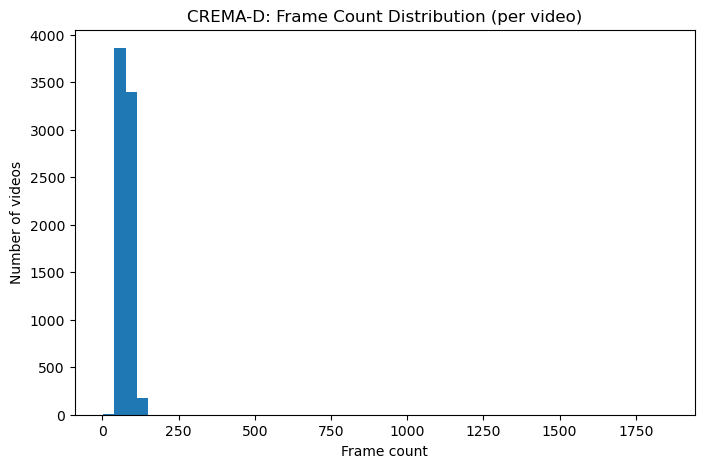

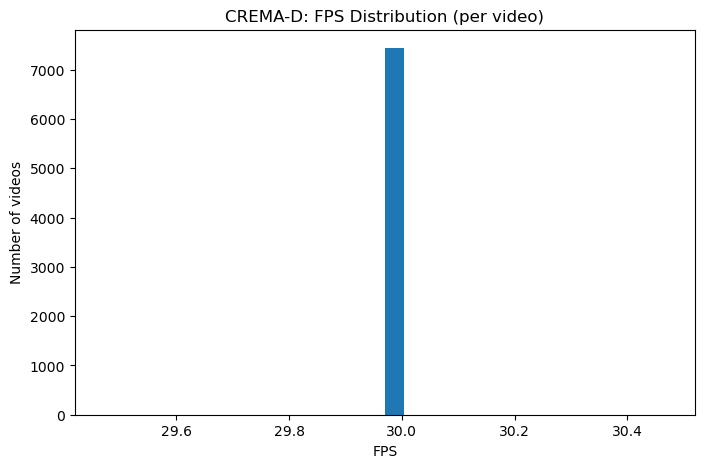

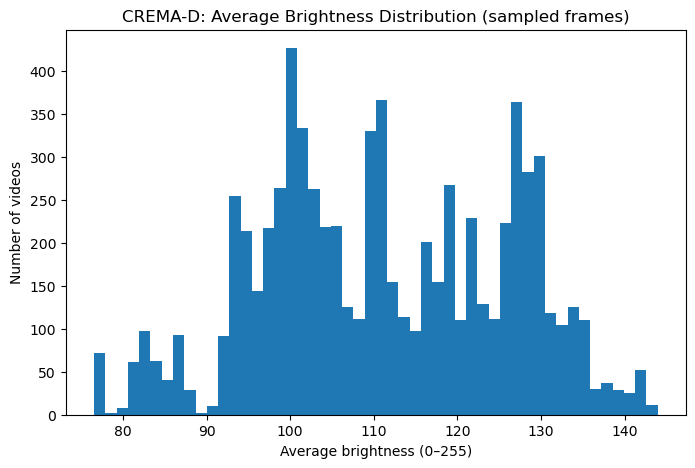

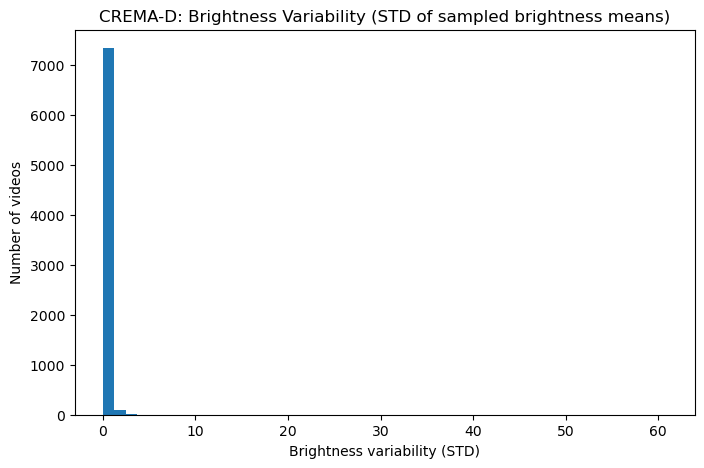

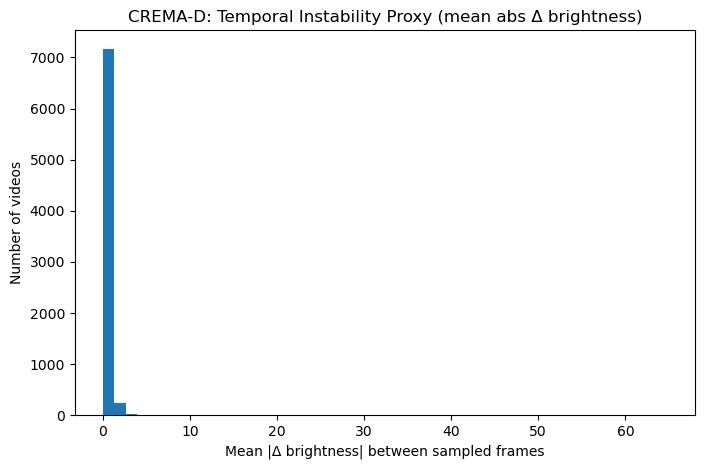

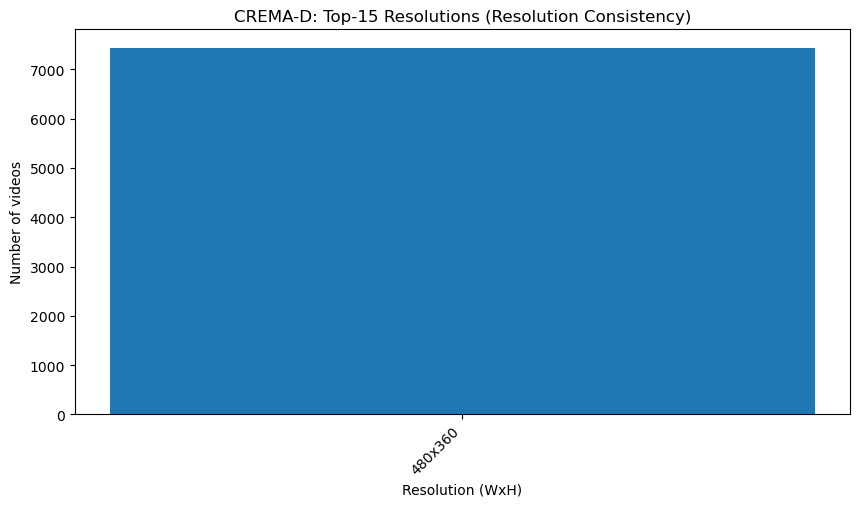

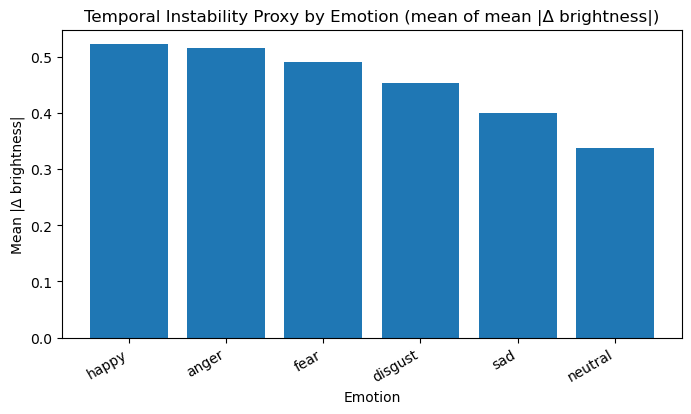


--- Resolution consistency check ---
Unique resolutions: 1
Most common resolution: 480x360

--- Missing label parsing check ---


file             0
actor_id         0
sentence_code    0
emotion_code     0
level_code       0
emotion          0
level            0
dtype: int64

In [7]:
# CREMA-D Video (FLV) — OpenCV in-memory frame sampling + FULL EDA/Statistics (NO SAVING)
# Outputs: df_videos (per-video stats) + multiple plots + consistency checks

import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Locate videos
# -----------------------------
CREMA_VIDEO_DIR = "crema-d-mirror/VideoFlash"  # change if needed
video_files = sorted(glob.glob(os.path.join(CREMA_VIDEO_DIR, "*.flv")))

print("Videos found:", len(video_files))
if len(video_files) == 0:
    raise FileNotFoundError("No .flv files found. Check CREMA_VIDEO_DIR path.")

# -----------------------------
# 2) Helpers
# -----------------------------
emo_map = {
    "ANG": "anger",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",
    "NEU": "neutral",
    "SAD": "sad"
}
level_map = {"LO": "low", "MD": "medium", "HI": "high", "XX": "unspecified"}

def parse_crema_filename(filename_no_ext: str) -> dict:
    # Example: 1001_IEO_SAD_HI
    parts = filename_no_ext.split("_")
    actor_id = parts[0] if len(parts) >= 1 else None
    sentence = parts[1] if len(parts) >= 2 else None
    emo_code = parts[2] if len(parts) >= 3 else None
    level_code = parts[3] if len(parts) >= 4 else None

    return {
        "actor_id": actor_id,
        "sentence_code": sentence,
        "emotion_code": emo_code,
        "emotion": emo_map.get(emo_code, "unknown"),
        "level_code": level_code,
        "level": level_map.get(level_code, "unknown")
    }

def frame_brightness_stats(frame_bgr):
    gray = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    return float(gray.mean()), float(gray.std())

# Sampling: every N frames (approx 1 sample/sec if fps ~ 30)
SAMPLE_EVERY_N_FRAMES = 30

# -----------------------------
# 3) Process videos (in-memory sampling)
# -----------------------------
rows = []
failed = 0

for i, path in enumerate(video_files, 1):
    base = os.path.basename(path)
    stem = os.path.splitext(base)[0]

    meta = parse_crema_filename(stem)

    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        failed += 1
        continue

    fps = cap.get(cv2.CAP_PROP_FPS)
    w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    sampled_means = []
    sampled_stds = []

    idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if idx % SAMPLE_EVERY_N_FRAMES == 0:
            m, s = frame_brightness_stats(frame)
            sampled_means.append(m)
            sampled_stds.append(s)

        idx += 1

    cap.release()

    if len(sampled_means) == 0:
        failed += 1
        continue

    sampled_means = np.array(sampled_means, dtype=np.float32)
    sampled_stds  = np.array(sampled_stds,  dtype=np.float32)

    # Temporal stability proxies (frame-to-frame brightness changes in sampled sequence)
    diffs = np.diff(sampled_means)
    abs_diffs = np.abs(diffs)

    rows.append({
        "file": base,
        "path": path,

        # Parsed labels
        **meta,

        # Video metadata
        "fps": float(fps) if fps is not None else np.nan,
        "width": w,
        "height": h,
        "resolution": f"{w}x{h}",
        "frame_count": total_frames,

        # Brightness variability (based on sampled frames)
        "brightness_mean_avg": float(sampled_means.mean()),
        "brightness_mean_std": float(sampled_means.std(ddof=0)),
        "brightness_std_avg": float(sampled_stds.mean()),

        # Temporal stability (sampled brightness changes)
        "brightness_absdiff_mean": float(abs_diffs.mean()) if abs_diffs.size > 0 else 0.0,
        "brightness_absdiff_std": float(abs_diffs.std(ddof=0)) if abs_diffs.size > 0 else 0.0,

        # Sampling info
        "n_sampled_frames": int(len(sampled_means)),
        "sample_every_n_frames": SAMPLE_EVERY_N_FRAMES
    })

    if i % 200 == 0:
        print(f"Processed {i}/{len(video_files)} videos...")

df_videos = pd.DataFrame(rows)
print("\nFailed/Skipped videos:", failed)
print("DataFrame shape:", df_videos.shape)
display(df_videos.head())

# -----------------------------
# 4) Basic descriptive stats
# -----------------------------
print("\n--- Numeric summary ---")
display(df_videos[[
    "fps", "width", "height", "frame_count",
    "brightness_mean_avg", "brightness_mean_std", "brightness_std_avg",
    "brightness_absdiff_mean", "brightness_absdiff_std",
    "n_sampled_frames"
]].describe())

print("\n--- Top resolutions ---")
display(df_videos["resolution"].value_counts().head(10))

print("\n--- FPS unique values (first 20) ---")
display(df_videos["fps"].round(3).value_counts().head(20))

# -----------------------------
# 5) Required EDA Plots
#    ✅ Temporal Stability
#    ✅ Brightness Variability
#    ✅ Resolution Consistency
# -----------------------------

# (A) Frame count distribution
plt.figure(figsize=(8, 5))
plt.hist(df_videos["frame_count"].dropna(), bins=50)
plt.title("CREMA-D: Frame Count Distribution (per video)")
plt.xlabel("Frame count")
plt.ylabel("Number of videos")
plt.show()

# (B) FPS distribution
plt.figure(figsize=(8, 5))
plt.hist(df_videos["fps"].dropna(), bins=30)
plt.title("CREMA-D: FPS Distribution (per video)")
plt.xlabel("FPS")
plt.ylabel("Number of videos")
plt.show()

# (C) Brightness mean distribution
plt.figure(figsize=(8, 5))
plt.hist(df_videos["brightness_mean_avg"].dropna(), bins=50)
plt.title("CREMA-D: Average Brightness Distribution (sampled frames)")
plt.xlabel("Average brightness (0–255)")
plt.ylabel("Number of videos")
plt.show()

# (D) Brightness variability distribution (std of sampled brightness means)
plt.figure(figsize=(8, 5))
plt.hist(df_videos["brightness_mean_std"].dropna(), bins=50)
plt.title("CREMA-D: Brightness Variability (STD of sampled brightness means)")
plt.xlabel("Brightness variability (STD)")
plt.ylabel("Number of videos")
plt.show()

# (E) Temporal stability distribution (mean abs diff of sampled brightness means)
plt.figure(figsize=(8, 5))
plt.hist(df_videos["brightness_absdiff_mean"].dropna(), bins=50)
plt.title("CREMA-D: Temporal Instability Proxy (mean abs Δ brightness)")
plt.xlabel("Mean |Δ brightness| between sampled frames")
plt.ylabel("Number of videos")
plt.show()

# (F) Resolution consistency
res_counts = df_videos["resolution"].value_counts().head(15)
plt.figure(figsize=(10, 5))
plt.bar(res_counts.index.astype(str), res_counts.values)
plt.title("CREMA-D: Top-15 Resolutions (Resolution Consistency)")
plt.xlabel("Resolution (WxH)")
plt.ylabel("Number of videos")
plt.xticks(rotation=45, ha="right")
plt.show()

# -----------------------------
# 6) Optional: Temporal stability by emotion (useful insight)
# -----------------------------
tmp = df_videos.groupby("emotion")["brightness_absdiff_mean"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
plt.bar(tmp.index.astype(str), tmp.values)
plt.title("Temporal Instability Proxy by Emotion (mean of mean |Δ brightness|)")
plt.xlabel("Emotion")
plt.ylabel("Mean |Δ brightness|")
plt.xticks(rotation=30, ha="right")
plt.show()

# -----------------------------
# 7) Quick checks (recommended)
# -----------------------------
print("\n--- Resolution consistency check ---")
print("Unique resolutions:", df_videos["resolution"].nunique())
print("Most common resolution:", df_videos["resolution"].mode().iloc[0])

print("\n--- Missing label parsing check ---")
display(df_videos[["file", "actor_id", "sentence_code", "emotion_code", "level_code", "emotion", "level"]]
        .isna().sum())

## AudioWAV

In [9]:
import os
import glob
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

CREMA_WAV_DIR = "crema-d-mirror/AudioWAV"  # change if needed

wav_files = sorted(glob.glob(os.path.join(CREMA_WAV_DIR, "*.wav")))
print("Total WAV files found:", len(wav_files))

emo_map = {
    "ANG": "anger",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",
    "NEU": "neutral",
    "SAD": "sad"
}

level_map = {
    "LO": "low",
    "MD": "medium",
    "HI": "high",
    "XX": "unspecified"
}

def parse_filename(path):
    base = os.path.basename(path).replace(".wav", "")
    parts = base.split("_")
    return {
        "path": path,
        "actor_id": parts[0],
        "sentence": parts[1],
        "emotion": emo_map.get(parts[2], "unknown"),
        "intensity": level_map.get(parts[3], "unknown")
    }

meta = [parse_filename(p) for p in wav_files]
df_audio = pd.DataFrame(meta)

df_audio.head()

Total WAV files found: 7442


,path,actor_id,sentence,emotion,intensity
0,crema-d-mirror/AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,anger,unspecified
1,crema-d-mirror/AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,disgust,unspecified
2,crema-d-mirror/AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,fear,unspecified
3,crema-d-mirror/AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,happy,unspecified
4,crema-d-mirror/AudioWAV/1001_DFA_NEU_XX.wav,1001,DFA,neutral,unspecified


In [10]:
def extract_audio_features(path):
    y, sr = librosa.load(path, sr=None)

    duration = len(y) / sr

    rms = librosa.feature.rms(y=y)[0].mean()
    zcr = librosa.feature.zero_crossing_rate(y)[0].mean()
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0].mean()

    # Pitch using librosa pyin
    f0, _, _ = librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7')
    )
    pitch_mean = np.nanmean(f0)

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = mfcc.mean(axis=1)

    return duration, rms, zcr, centroid, pitch_mean, mfcc_mean

features = []

for i, row in df_audio.iterrows():
    duration, rms, zcr, centroid, pitch, mfcc = extract_audio_features(row["path"])

    features.append({
        "duration": duration,
        "rms_energy": rms,
        "zcr": zcr,
        "spectral_centroid": centroid,
        "pitch_mean": pitch,
        **{f"mfcc_{i}": mfcc[i] for i in range(13)}
    })

    if (i+1) % 500 == 0:
        print(f"Processed {i+1}/{len(df_audio)}")

df_features = pd.concat([df_audio, pd.DataFrame(features)], axis=1)

df_features.head()

/var/folders/9f/6qg34p2s30193cg9bljch5k00000gn/T/ipykernel_14874/3902225300.py:16: RuntimeWarning: Mean of empty slice
  pitch_mean = np.nanmean(f0)


Processed 500/7442
Processed 1000/7442
Processed 1500/7442
Processed 2000/7442
Processed 2500/7442
Processed 3000/7442
Processed 3500/7442
Processed 4000/7442
Processed 4500/7442
Processed 5000/7442
Processed 5500/7442
Processed 6000/7442
Processed 6500/7442
Processed 7000/7442


,path,actor_id,sentence,emotion,intensity,duration,rms_energy,zcr,spectral_centroid,pitch_mean,...,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,crema-d-mirror/AudioWAV/1001_DFA_ANG_XX.wav,1001,DFA,anger,unspecified,2.275562,0.041986,0.101868,1584.993071,198.731875,...,23.965403,7.477993,-5.759456,-11.883089,-9.676736,-3.996747,-13.352565,0.408197,-9.709486,-6.127124
1,crema-d-mirror/AudioWAV/1001_DFA_DIS_XX.wav,1001,DFA,disgust,unspecified,2.335688,0.015996,0.093061,1531.650486,NaN,...,31.619215,15.872088,-6.845447,-6.629935,-4.978728,-5.310654,-10.283518,-2.534367,-7.255390,-6.153906
2,crema-d-mirror/AudioWAV/1001_DFA_FEA_XX.wav,1001,DFA,fear,unspecified,2.168813,0.045776,0.084286,1489.088839,281.879258,...,23.323242,11.719156,-7.116331,-8.534803,-4.996966,-4.994400,-13.706510,-3.357413,-8.454173,-6.561941
3,crema-d-mirror/AudioWAV/1001_DFA_HAP_XX.wav,1001,DFA,happy,unspecified,1.868500,0.042300,0.084878,1555.376035,77.423870,...,27.970133,10.869824,-11.878345,-10.095112,-7.149731,-7.651760,-17.085901,-0.201025,-8.867324,-9.357766
4,crema-d-mirror/AudioWAV/1001_DFA_NEU_XX.wav,1001,DFA,neutral,unspecified,2.035375,0.020450,0.082031,1495.394998,191.407180,...,30.160906,11.466775,-3.333670,-8.350987,-9.757346,-6.079328,-12.109531,1.537681,-9.795647,-3.472060


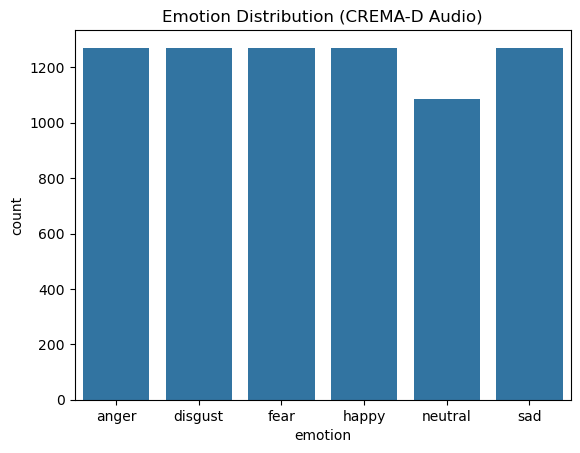

In [11]:
sns.countplot(data=df_features, x="emotion")
plt.title("Emotion Distribution (CREMA-D Audio)")
plt.show()

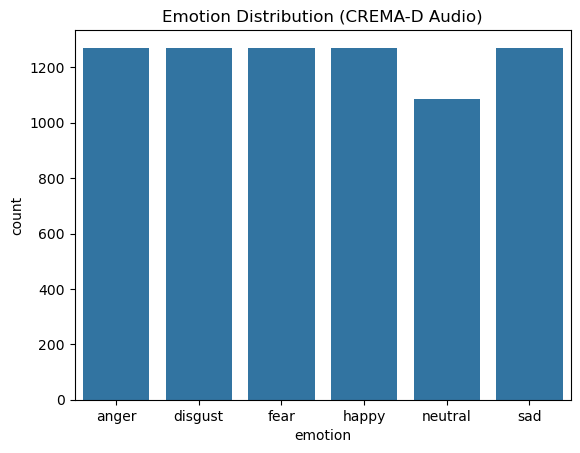

In [12]:
sns.countplot(data=df_features, x="emotion")
plt.title("Emotion Distribution (CREMA-D Audio)")
plt.show()

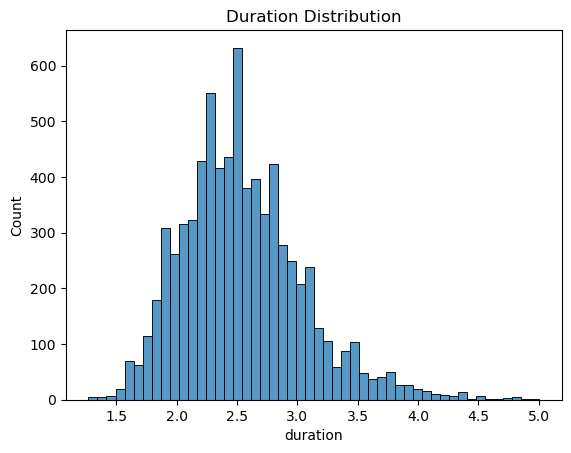

emotion
anger      2.584391
disgust    2.778297
fear       2.512276
happy      2.342003
neutral    2.430809
sad        2.593301
Name: duration, dtype: float64

In [13]:
sns.histplot(df_features["duration"], bins=50)
plt.title("Duration Distribution")
plt.show()

df_features.groupby("emotion")["duration"].mean()

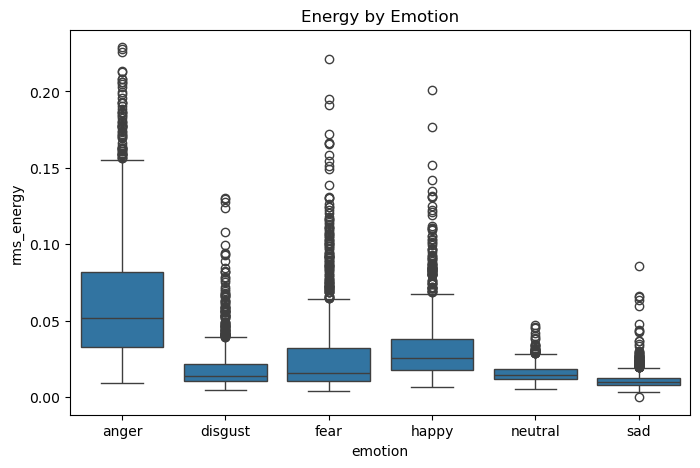

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_features, x="emotion", y="rms_energy")
plt.title("Energy by Emotion")
plt.show()

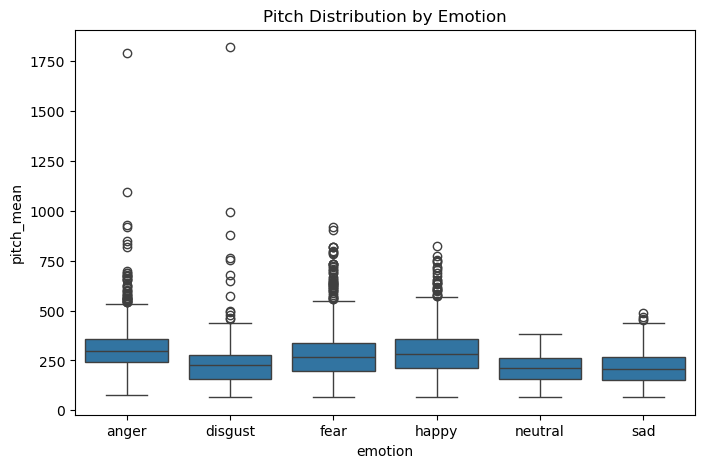

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_features, x="emotion", y="pitch_mean")
plt.title("Pitch Distribution by Emotion")
plt.show()

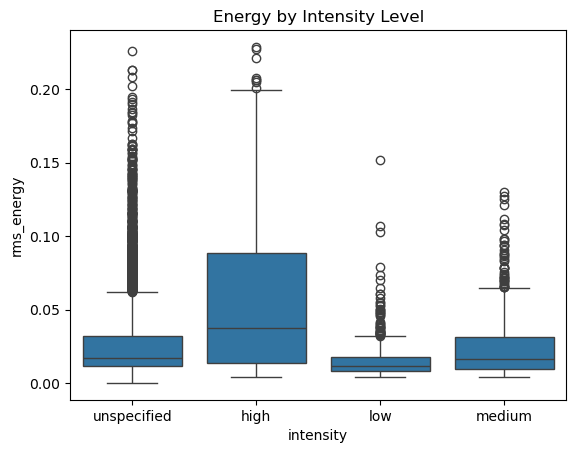

In [16]:
sns.boxplot(data=df_features, x="intensity", y="rms_energy")
plt.title("Energy by Intensity Level")
plt.show()

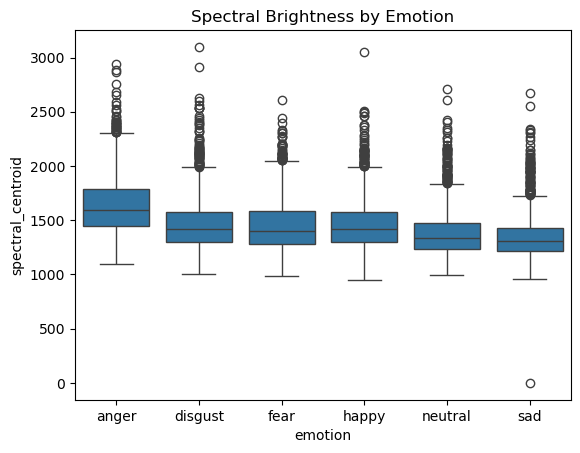

In [17]:
sns.boxplot(data=df_features, x="emotion", y="spectral_centroid")
plt.title("Spectral Brightness by Emotion")
plt.show()

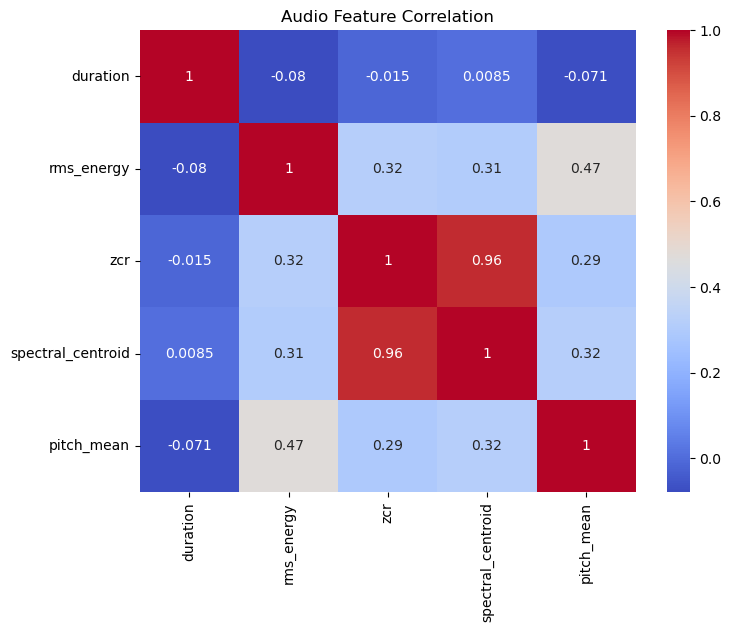

In [18]:
numeric_cols = [
    "duration", "rms_energy", "zcr",
    "spectral_centroid", "pitch_mean"
]

plt.figure(figsize=(8,6))
sns.heatmap(df_features[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Audio Feature Correlation")
plt.show()

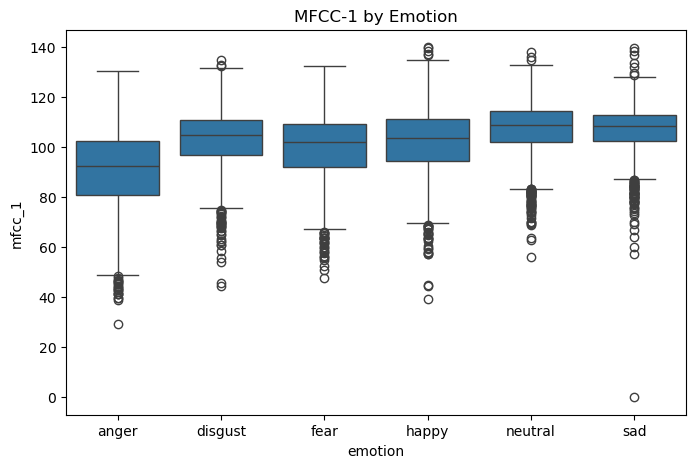

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_features, x="emotion", y="mfcc_1")
plt.title("MFCC-1 by Emotion")
plt.show()